In [13]:
### Carga de paquetes y librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import tensorflow as tf #Framework para deep learning
from tensorflow import keras #API que contiene la mayoría de funciones para las RN
from tensorflow.keras import regularizers
from keras_tuner.tuners import RandomSearch

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape



((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Tamaño de las imagenes en el dataset, 6000 ejemplos con una matriz de 28 x 28 pixeles

In [4]:
np.unique(y_train, return_counts=True)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

Categorias en el dataset, cantidad de datos por categoria

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Observación cero


0

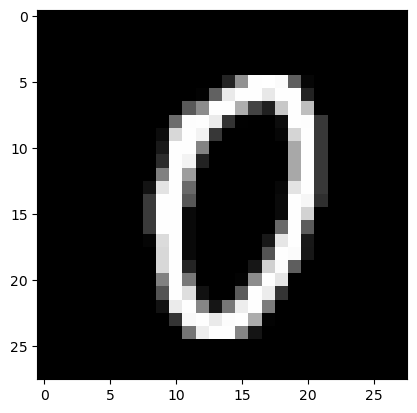

In [7]:
### Visualización de algunos datos
plt.imshow(x_train[1000], cmap='gray') #cmap en gray porque esta en escala de grises, observación 1000
y_train[1000] #Etiqueta de la imagen

Primero vamos a probar el modelo de random forest, se deben aplanar las matrices para que el modelo pueda entender los datos. 
Ademas estandarizamos los datos.

In [15]:
x_train2 = x_train/255 # Valores entre 0 y 1
x_test2 = x_test/255
x_train2.shape, x_test2.shape
fxc=int(x_train2.shape[1])*int(x_train2.shape[2])
fxc


784

Aplanamos la matriz

In [25]:
x_trainr = x_train2.reshape(x_train2.shape[0], fxc)
x_testr = x_test2.reshape(x_test2.shape[0], fxc)

x_trainr.shape  

(60000, 784)

Se paso de una matris multidimensional a una matriz de 2x2

# RANDOM FOREST CLASSIFIER

In [26]:
modelo1 = RandomForestClassifier(min_samples_leaf=10, n_estimators=10, random_state=42)
modelo1.fit(x_trainr, y_train)

RandomForestClassifier(min_samples_leaf=10, n_estimators=10, random_state=42)

Se crea la instancia y se ajustan los datos


In [27]:
# DESEMPEÑO
pred_train_mod1 = modelo1.predict(x_trainr) ##predicciones en entrenamiento
pred_test_mod2 = modelo1.predict(x_testr) ##predicciones en test

print(metrics.classification_report(y_train, pred_train_mod1)) #métricas en entrenamiento
print(metrics.classification_report(y_test, pred_test_mod2 )) #métricas en evaluación

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5923
           1       0.98      0.99      0.99      6742
           2       0.96      0.97      0.96      5958
           3       0.97      0.95      0.96      6131
           4       0.97      0.97      0.97      5842
           5       0.96      0.96      0.96      5421
           6       0.97      0.98      0.98      5918
           7       0.97      0.97      0.97      6265
           8       0.96      0.96      0.96      5851
           9       0.95      0.95      0.95      5949

    accuracy                           0.97     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.97      0.97      0.97     60000

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.99      0.99      1135
           2       0.94      0.94      0.94      1032
           3       0.94 

Evaluando la metrica de exactitud en el modelo, se tiene que para el entrenamiento el accuracy es del 97% y para la validación un valor del 95%, por lo tanto se tienen buenas metricas, ademas no se evidencia sobreajuste. Finalmente este tipo de modelo deja en el camino caracteristicas propias de la imagen, por lo tanto mas adelante se consideran otros modelos que pueden responder mejor a cambios en la imagenes de entrada y que ademas aprenden otros patrones.

Matriz de confusión

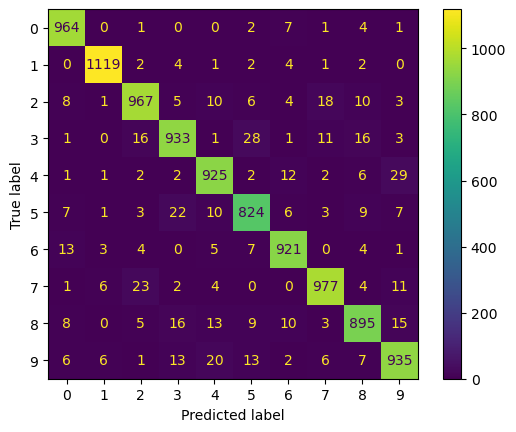

In [28]:
cm = metrics.confusion_matrix(y_test, pred_test_mod2 ) # evaluación
matriz = metrics.ConfusionMatrixDisplay(cm) # Matriz datos de validación
matriz.plot()

# ANN 1

Se instancia la primera red neuronal con una sola capa oculta con una funcion de activación Relu, la cual siempre da valores positivos y cero cuando son negativos. Finalmente se muestran la cantidad de parametros

In [57]:
ann1 = keras.models.Sequential(
    [keras.layers.Flatten(input_shape=[x_train2.shape[1], x_train2.shape[2]]), #Capa de entrada, flatten aplana la matriz
    keras.layers.Dense(128, activation='relu'), #activacion de las neuronas con Relu, 128 neuronas en la primera capa oculta, siempre valores positivos, negativos cero.
    keras.layers.Dense(10, activation='softmax')] #activacion para capa de salida con softmax
)
display(ann1.count_params())
display(60000/ann1.count_params())

101770

0.5895647047263437

Se tienen 101770 parametros en el modelo, ademas un grado de libertad de 0.58, esta lejano a uno, por lo que se puede mejorar la arquitectura de la red.

In [58]:
print(ann1.summary())# resumen

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               100480    
                                                                 
 dense_18 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [59]:
# Compilación ANN ( la compilación es lo mismo que entrenar )
ann1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) #El optimizador es para que los parametros de la red se ajusten de la mejor forma, luego función de perdida, y finalmente la metrica.
modelo2=ann1.fit(x_train2, y_train, epochs=10, validation_data=(x_test2, y_test))

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2570 - accuracy: 0.9277 - val_loss: 0.1345 - val_accuracy: 0.9603
Epoch 2/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1116 - accuracy: 0.9666 - val_loss: 0.0924 - val_accuracy: 0.9722
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0768 - accuracy: 0.9771 - val_loss: 0.0833 - val_accuracy: 0.9727
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0586 - accuracy: 0.9819 - val_loss: 0.0848 - val_accuracy: 0.9726
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0448 - accuracy: 0.9859 - val_loss: 0.0731 - val_accuracy: 0.9782
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0357 - accuracy: 0.9890 - val_loss: 0.0708 - val_accuracy: 0.9781
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0296 - accuracy: 0.9905 - val_loss: 0.0734 - val_accuracy

Con las 10 epoch anteriores se logro un accuracy del 98,0 %, es un buen valor para la primera red construida, luego se comparará con los demas modelos.

Se grafica

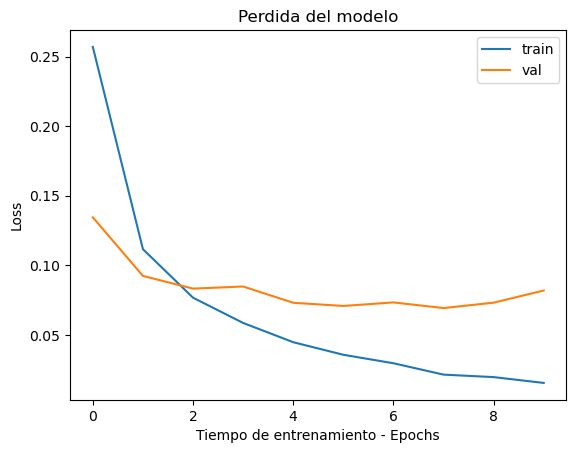

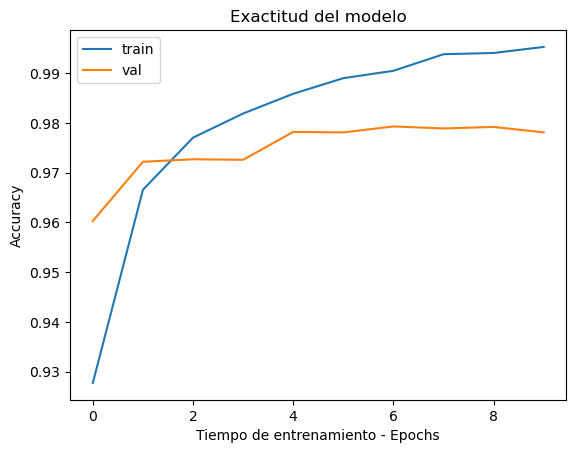

In [61]:
### Visualización de las curvas de error
plt.plot(modelo2.history['loss'])
plt.plot(modelo2.history['val_loss'])
plt.title('Perdida del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

### Visualización de las curvas de error
plt.plot(modelo2.history['accuracy'])
plt.plot(modelo2.history['val_accuracy'])
plt.title('Exactitud del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()


# ANN 2 


In [62]:
ann2 = keras.models.Sequential(
    [keras.layers.Flatten(input_shape=[x_train2.shape[1], x_train2.shape[2]]), #Capa de entrada, flatten aplana la matriz
    keras.layers.Dense(128, activation='tanh'), #activacion de las neuronas con Relu, 128 neuronas en la primera capa oculta, siempre valores positivos, negativos cero.
    keras.layers.Dense(10, activation='softmax')] #activacion para capa de salida con softmax
)
display(ann2.count_params())
display(60000/ann2.count_params())

101770

0.5895647047263437

In [63]:
print(ann2.summary())# resumen

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               100480    
                                                                 
 dense_20 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [64]:
# Compilación ANN ( la compilación es lo mismo que entrenar )
ann2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) #El optimizador es para que los parametros de la red se ajusten de la mejor forma, luego función de perdida, y finalmente la metrica.
modelo3=ann2.fit(x_train2, y_train, epochs=10, validation_data=(x_test2, y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2873 - accuracy: 0.9176 - val_loss: 0.1717 - val_accuracy: 0.9498
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1371 - accuracy: 0.9605 - val_loss: 0.1161 - val_accuracy: 0.9653
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0939 - accuracy: 0.9726 - val_loss: 0.0990 - val_accuracy: 0.9699
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0683 - accuracy: 0.9802 - val_loss: 0.0835 - val_accuracy: 0.9757
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0518 - accuracy: 0.9852 - val_loss: 0.0838 - val_accuracy: 0.9740
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0396 - accuracy: 0.9889 - val_loss: 0.0772 - val_accuracy: 0.9754
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0305 - accuracy: 0.9914 - val_loss: 0.0771 - val_accuracy

Con las 10 epoch anteriores se logro un accuracy del 97,8 %, es un buen valor para la primera red construida, finalmente este modelo en la validación fue un poco peor que el anterior, sin embargo el valor esta muy cerca.

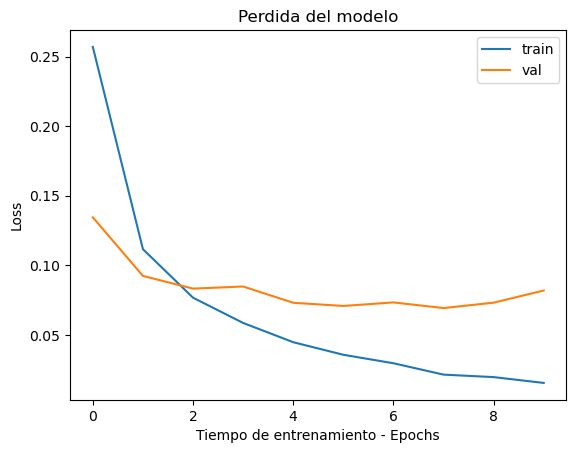

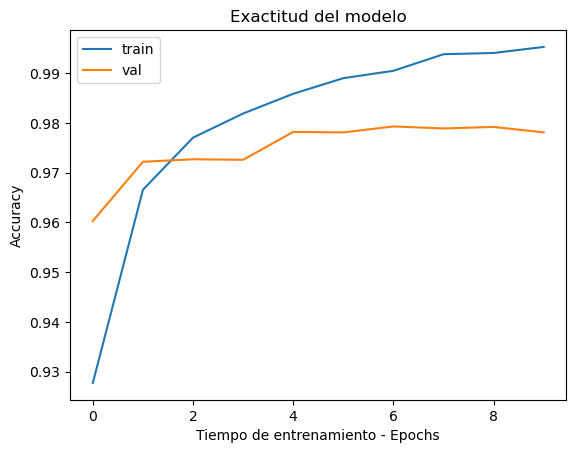

In [65]:
### Visualización de las curvas de error
plt.plot(modelo2.history['loss'])
plt.plot(modelo2.history['val_loss'])
plt.title('Perdida del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

### Visualización de las curvas de error
plt.plot(modelo2.history['accuracy'])
plt.plot(modelo2.history['val_accuracy'])
plt.title('Exactitud del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()


#ANN con activación Relu y Tanh



In [52]:
ann3 = keras.models.Sequential(
    [keras.layers.Flatten(input_shape=[x_train2.shape[1], x_train2.shape[2]]), #Capa de entrada, flatten aplana la matriz
    keras.layers.Dense(128, activation='relu'), #activacion de las neuronas con Relu, 128 neuronas en la primera capa oculta, siempre valores positivos, negativos cero.
        keras.layers.Dense(64, activation='tanh'), #activacion de las neuronas con tanh, 64 neuronas en la primera capa oculta.
    keras.layers.Dense(10, activation='softmax')] #activacion para capa de salida con softmax
)
display(ann3.count_params())
display(60000/ann3.count_params())

109386

0.5485162635072129

In [53]:
print(ann3.summary())# resumen

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [54]:
# Compilación ANN ( la compilación es lo mismo que entrenar )
ann3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) #El optimizador es para que los parametros de la red se ajusten de la mejor forma, luego función de perdida, y finalmente la metrica.
modelo4=ann3.fit(x_train2, y_train, epochs=10, validation_data=(x_test2, y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2285 - accuracy: 0.9335 - val_loss: 0.1244 - val_accuracy: 0.9619
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0946 - accuracy: 0.9704 - val_loss: 0.0864 - val_accuracy: 0.9722
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0660 - accuracy: 0.9794 - val_loss: 0.0826 - val_accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0489 - accuracy: 0.9840 - val_loss: 0.0744 - val_accuracy: 0.9783
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0388 - accuracy: 0.9869 - val_loss: 0.0838 - val_accuracy: 0.9740
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0295 - accuracy: 0.9904 - val_loss: 0.0698 - val_accuracy: 0.9773
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0248 - accuracy: 0.9917 - val_loss: 0.0833 - val_accur

Este modelo que tiene una capa de mas que los modelos anteriores y en donde se mezclan las dos activaciones vistas anteriormentes, se tienen un accuracy de 97,7%, el cual es bueno, pero no mejor que los anteriores modelos. Ademas no se esta sobreajustando los datos

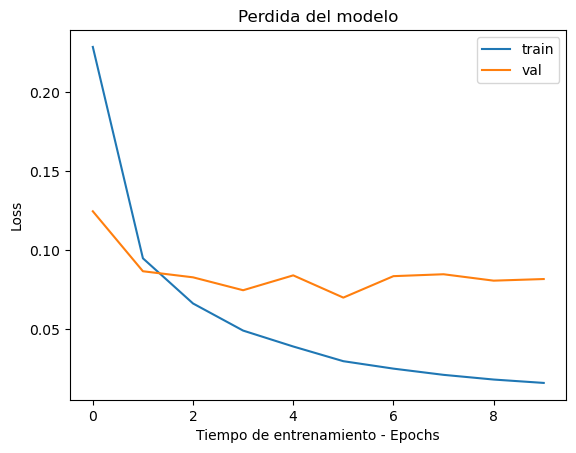

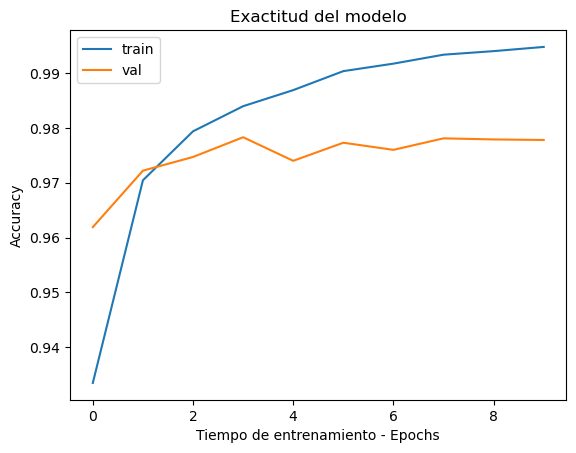

In [60]:
### Visualización de las curvas de error
plt.plot(modelo4.history['loss'])
plt.plot(modelo4.history['val_loss'])
plt.title('Perdida del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

### Visualización de las curvas de error
plt.plot(modelo4.history['accuracy'])
plt.plot(modelo4.history['val_accuracy'])
plt.title('Exactitud del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()


Se regulariza para disminuir el poco sobreajuste que presento el modelo anterior

In [69]:
ann4 = keras.models.Sequential(
    [keras.layers.Flatten(input_shape=[x_train2.shape[1], x_train2.shape[2]]), #Capa de entrada, flatten aplana la matriz
    keras.layers.Dense(128, activation='relu', kernel_regularizer= regularizers.L2(l2=0.01)), #factor de regularización 0.01, es el que esta igual por defecto
        keras.layers.Dense(64, activation='tanh', kernel_regularizer= regularizers.L2(l2=0.01) ), #factor de regularización 0.01, es el que esta igual por defecto
    keras.layers.Dense(10, activation='softmax')] #activacion para capa de salida con softmax
)
display(ann4.count_params())
display(60000/ann4.count_params())

109386

0.5485162635072129

In [70]:
# Compilación ANN ( la compilación es lo mismo que entrenar )
ann4.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) #El optimizador es para que los parametros de la red se ajusten de la mejor forma, luego función de perdida, y finalmente la metrica.
modelo5=ann4.fit(x_train2, y_train, epochs=10, validation_data=(x_test2, y_test))

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.7519 - accuracy: 0.9031 - val_loss: 0.4633 - val_accuracy: 0.9322
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4463 - accuracy: 0.9321 - val_loss: 0.3902 - val_accuracy: 0.9423
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3921 - accuracy: 0.9401 - val_loss: 0.3614 - val_accuracy: 0.9462
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3577 - accuracy: 0.9454 - val_loss: 0.3322 - val_accuracy: 0.9474
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3357 - accuracy: 0.9488 - val_loss: 0.3450 - val_accuracy: 0.9431
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3205 - accuracy: 0.9508 - val_loss: 0.3163 - val_accuracy: 0.9506
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3122 - accuracy: 0.9515 - val_loss: 0.2887 - val_accura

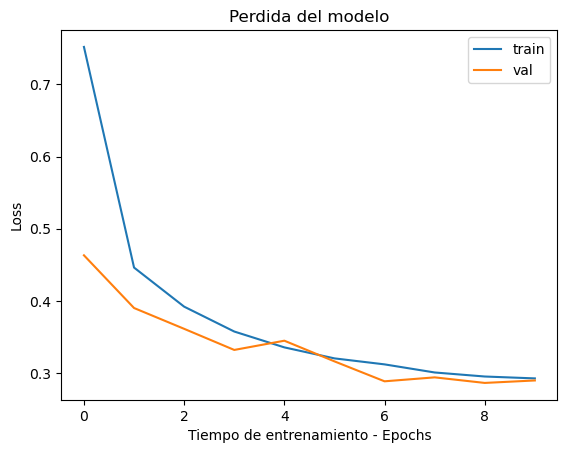

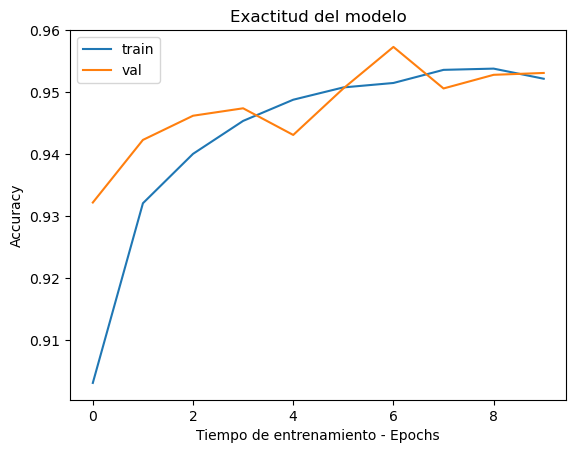

In [71]:
### Visualización de las curvas de error
plt.plot(modelo5.history['loss'])
plt.plot(modelo5.history['val_loss'])
plt.title('Perdida del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

### Visualización de las curvas de error
plt.plot(modelo5.history['accuracy'])
plt.plot(modelo5.history['val_accuracy'])
plt.title('Exactitud del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()


La regularización ayudo a cerrar brecha en el error y en el accuracy en este ultimo modelo. Al penalizar relaciones entre neuronas esta permitiendo mejorar el rendimiento del modelo, sin embargo el valor del accuracy en general disminuye tanto en entrenamiento y en validación.

# OPTIMIZACIÓN DE LA RED NEURONAL

Trial 5 Complete [00h 02m 15s]
val_accuracy: 0.973966658115387

Best val_accuracy So Far: 0.9785333474477133
Total elapsed time: 00h 20m 05s
units_1 192
units_2 128
learning_rate 0.001
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 192)               150720    
                                                                 
 dense_1 (Dense)             (None, 128)               24704     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 176714 (690.29 KB)
Trainable params: 176714 (690.29 KB)
Non-trainable params: 0 (0.00 Byte)
_____________________________

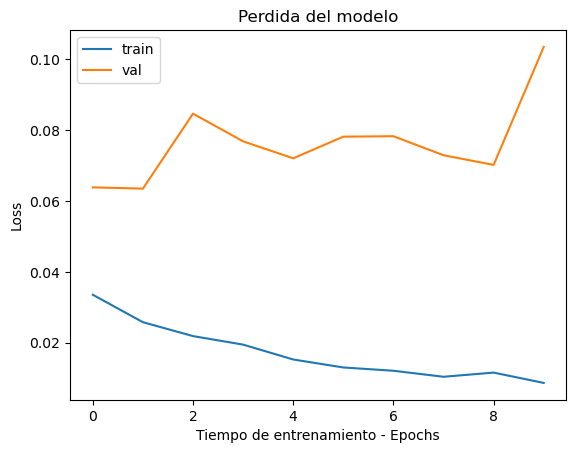

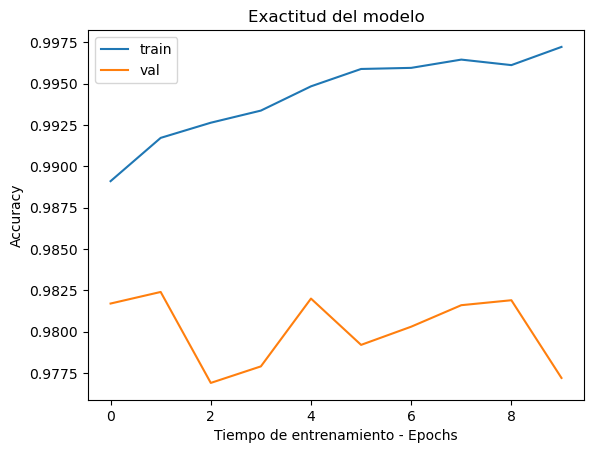

In [16]:
### Definición del Hyper model, indica al tuneador donde debe realizar la busqueda.
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))

    # Defenición de la primera capa oculta con ajuste de hiperparámetros
    # Elegir el valor óptimo entre 32 - 512 neuronas
    hp_units_1 = hp.Int('units_1', min_value=32, max_value=512, step=32) #pasos en que va a variar
    model.add(keras.layers.Dense(units=hp_units_1, activation='relu'))

    # Defenición de la segunda capa oculta con ajuste de hiperparámetros
    # Elegir el valor óptimo entre 32 - 512 neuronas
    hp_units_2 = hp.Int('units_2', min_value=32, max_value=512, step=32)
    model.add(keras.layers.Dense(units=hp_units_2, activation='tanh'))

    # Definición de la capa de salida
    model.add(keras.layers.Dense(10, activation='softmax'))

    # Definición de la tasa de aprendizaje del optimizador
    # Elegir el valor óptimos entre 0.1, 0.01, 0.001, 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[0.1, 0.01, 0.001, 0.0001])
    model.compile(
        optimizer = keras.optimizers.Adam(learning_rate= hp_learning_rate),
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
    )

    return model

### Definción del tuner
tuner = RandomSearch(
    build_model,
    objective= 'val_accuracy',
    max_trials=5, #cuantas convinaciones diferentes de hyperparametros se van probar en el proceso de busqueda
    executions_per_trial= 3, #cuantos entrenamientos se van a realizar de la red neuronal por cada intento o combinacion de hiperparametros
    directory = 'results_tuner',
    project_name = 'fashion_mnist'
)

### Ejecución del Tuner
tuner.search(x_train2, y_train, epochs=5, validation_data= (x_test2, y_test))

### Mostrar el mejor modelo
for h_param in [f"units_{i}" for i in range(1,3)] + ['learning_rate']:
                print(h_param, tuner.get_best_hyperparameters()[0].get(h_param))

### Almacenar el mejor modelo
best_model = tuner.get_best_models()[0]
### Definir la arquitectura del modelo según hiperparámetros optimos
best_model.build(x_train2.shape)
### Resumen de la arquitectura
best_model.summary()

### Ajuste de la red neuronal con hiperparámetros optimos
modelo6 = best_model.fit(x_train2, y_train, epochs=10, validation_data = (x_test2, y_test))

### Cual es el epoch con max val_accuracy
val_accuracy_per_epoch = modelo6.history['val_accuracy']
best_epoch = val_accuracy_per_epoch.index(max(val_accuracy_per_epoch))+1
print(f"Best epoch: {best_epoch}")

### Visualización de las curvas de error
plt.plot(modelo6.history['loss'])
plt.plot(modelo6.history['val_loss'])
plt.title('Perdida del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

### Visualización de las curvas de error
plt.plot(modelo6.history['accuracy'])
plt.plot(modelo6.history['val_accuracy'])
plt.title('Exactitud del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])